# PRACTICA NLP ROBERTO MARTINEZ CAMACHO

# Ejercicio 3 - NLG

Imports y librerias

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
from keras.optimizers import RMSprop
import pickle
from copy import deepcopy

Using TensorFlow backend.
C:\Users\Rober\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Rober\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Rober\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Rober\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Lectura de datos

In [2]:
df = pd.read_csv('../../Práctica Final/BarackObama.csv')
df.dropna(subset=['text'], inplace=True)
text = ''
for t in df['text']:
    text += ' ' + t

In [3]:
df.head()

,Unnamed: 0,date,id,link,retweet,text,author
0,0,20h20 hours ago,786982739517943808,/BarackObama/status/786982739517943808,False,Denying climate change is dangerous. Join @OFA...,BarackObama
1,1,18h18 hours ago,787010142378332160,/BarackObama/status/787010142378332160,False,The American Bar Association gave Judge Garlan...,BarackObama
2,2,16h16 hours ago,787039774330748928,/BarackObama/status/787039774330748928,False,We need a fully functional Supreme Court. Edit...,BarackObama
3,3,21h21 hours ago,786964419905523712,/BarackObama/status/786964419905523712,False,"Cynics, take note: When we #ActOnClimate, we b...",BarackObama
4,4,Oct 13,786680553617629184,/BarackObama/status/786680553617629185,False,"""That’s how we will overcome the challenges we...",BarackObama


In [4]:
df = df[['text']]
df.dropna(inplace=True)

Nos quedamos solamente con la columna de "text" donde viene el tweet y guardamos en una variable todos los textos juntos.

In [5]:
df['text'][0]

'Denying climate change is dangerous. Join @OFA supporters in standing up for bold action now: http://ofa.bo/2dZNTRx\xa0 #ActOnClimate'

Podemos ver todos los tweets concatenados y la informacion de los caracteres..

In [6]:
text

' Denying climate change is dangerous. Join @OFA supporters in standing up for bold action now: http://ofa.bo/2dZNTRx\xa0 #ActOnClimate The American Bar Association gave Judge Garland its highest rating. Senate leaders: #DoYourJob and fill the #SCOTUS vacancy.pic.twitter.com/4yseqnOBX4 We need a fully functional Supreme Court. Editorial boards across the country agree: http://ofa.bo/2dCG7KU\xa0 #DoYourJob Cynics, take note: When we #ActOnClimate, we build a stronger future.pic.twitter.com/wHHMdo2ro6 "That’s how we will overcome the challenges we face: by unleashing the power of all of us for all of us." Read more:http://ofa.bo/2dNlZZy\xa0 Check out the most recent editorial boards calling on Senate leaders to vote on Judge Garland: http://ofa.bo/2dNKl4h\xa0 #DoYourJob Senate leaders\' political games are handicapping the Supreme Court—and judgeships across the country. http://ofa.bo/2dVVHno\xa0 #DoYourJob Support the bold steps we\'re taking against climate change. Say you\'re ready to

In [7]:
list(set(text))

['4',
 '…',
 'i',
 'z',
 'h',
 'D',
 ';',
 'é',
 'P',
 'S',
 'r',
 '\xa0',
 ',',
 'F',
 '9',
 '0',
 '!',
 'B',
 'E',
 'g',
 '(',
 '.',
 '✓',
 '=',
 ' ',
 ')',
 't',
 '–',
 '3',
 'x',
 '5',
 '+',
 'y',
 "'",
 '‘',
 '$',
 'I',
 'M',
 '”',
 'p',
 '6',
 '“',
 'K',
 '8',
 '[',
 'n',
 '/',
 'R',
 'à',
 'a',
 'W',
 'v',
 'o',
 '#',
 'Q',
 '7',
 'u',
 'b',
 '2',
 '¡',
 'q',
 'H',
 'X',
 '’',
 'w',
 'l',
 '-',
 'j',
 'V',
 '√',
 ']',
 'd',
 ':',
 '&',
 '_',
 '\n',
 'N',
 's',
 'C',
 '>',
 '@',
 '—',
 'Z',
 '․',
 'e',
 'k',
 'G',
 'Y',
 'm',
 '1',
 'L',
 '\xad',
 'U',
 'O',
 '?',
 '"',
 '%',
 'J',
 'f',
 'T',
 'A',
 'c']

In [8]:
characters = sorted(list(set(text)))
n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

print('Unique chars: {}'.format(len(characters)))

Unique chars: 102


In [9]:
print(characters)

['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0', '¡', '\xad', 'à', 'é', '–', '—', '‘', '’', '“', '”', '․', '…', '√', '✓']


Aqui podemos analizar el numero de Unique chars: 102 asi que vamos a intentar hacer un preprocesado para intentar limpiar algo el texto.

In [10]:
text = text.lower()

In [11]:
characters = sorted(list(set(text)))
n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

print('Unique chars: {}'.format(len(characters)))

Unique chars: 76


In [12]:
print(characters)

['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '>', '?', '@', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0', '¡', '\xad', 'à', 'é', '–', '—', '‘', '’', '“', '”', '․', '…', '√', '✓']


In [13]:
text = re.sub(r'[^a-z0-9]+', ' ', text) #solo numeros y letras minusculas

In [14]:
characters = sorted(list(set(text)))
n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

print('Unique chars: {}'.format(len(characters)))

Unique chars: 37


In [15]:
print(characters)

[' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


# Data preprocessing

In [16]:
X = []
Y = []
length = len(text)
seq_length = 100
for i in range(0, length-seq_length, 1):
    sequence = text[i:i + seq_length]
    label =text[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])
X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = np_utils.to_categorical(Y)

Podemos analizar un poco, los indices de un tweet, un tweet en particular o la longitud de X en algun indice.

In [17]:
X[5]

[19,
 24,
 17,
 0,
 13,
 22,
 19,
 23,
 11,
 30,
 15,
 0,
 13,
 18,
 11,
 24,
 17,
 15,
 0,
 19,
 29,
 0,
 14,
 11,
 24,
 17,
 15,
 28,
 25,
 31,
 29,
 0,
 20,
 25,
 19,
 24,
 0,
 25,
 16,
 11,
 0,
 29,
 31,
 26,
 26,
 25,
 28,
 30,
 15,
 28,
 29,
 0,
 19,
 24,
 0,
 29,
 30,
 11,
 24,
 14,
 19,
 24,
 17,
 0,
 31,
 26,
 0,
 16,
 25,
 28,
 0,
 12,
 25,
 22,
 14,
 0,
 11,
 13,
 30,
 19,
 25,
 24,
 0,
 24,
 25,
 33,
 0,
 18,
 30,
 30,
 26,
 0,
 25,
 16,
 11,
 0,
 12,
 25,
 0,
 3]

In [18]:
text[:50]

' denying climate change is dangerous join ofa supp'

In [19]:
len(X[0])

100

# Modelos

In [20]:
vocab_size = len(characters)

In [21]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_modified.shape[1], X_modified.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(Y_modified.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 37)                3737      
Total params: 44,537
Trainable params: 44,537
Non-trainable params: 0
_________________________________________________________________


# Entrenamiento

In [26]:
#history = model.fit(X_modified, Y_modified, validation_split=0.05, batch_size=256, epochs=5, shuffle=True).history 

In [27]:
# Load the model
model = load_model('../../data/keyboard/keras_model_OK.h5')
history = pickle.load(open('../../data/keyboard/history.p', 'rb'))

# Evaluacion del modelo

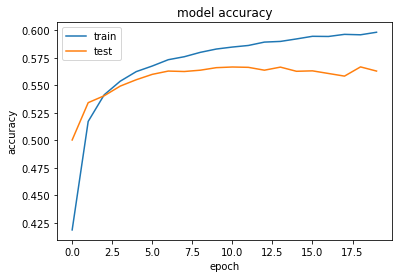

In [28]:
# Model accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

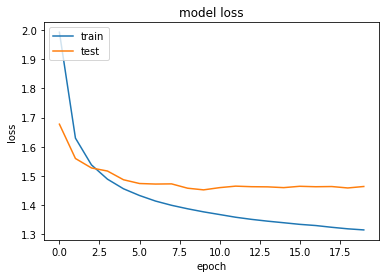

In [29]:
# Model loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

# Resultados

In [30]:
def generate_text(model, string_id):
    string_mapped = deepcopy(string_id)
    full_string = [n_to_char[value] for value in string_mapped]
    
    # Generating characters
    for i in range(140):
        x = np.reshape(string_mapped,(1,len(string_mapped), 1))
        x = x / float(len(characters))

        pred_index = np.argmax(model.predict(x, verbose=0))
        seq = [n_to_char[value] for value in string_mapped]
        full_string.append(n_to_char[pred_index])

        string_mapped.append(pred_index)
        string_mapped = string_mapped[1:len(string_mapped)]
        
    text = ""
    for char in full_string:
        text = text + char
    return text

In [31]:
model_1_results = generate_text(model, X[5])

In [32]:
t = ''
for ch in X[5]:
    t += n_to_char.get(ch)
print(t)

ing climate change is dangerous join ofa supporters in standing up for bold action now http ofa bo 2


In [33]:
print(model_1_results)

ing climate change is dangerous join ofa supporters in standing up for bold action now http ofa bo 2tf pi the wee toene to ae ooesident oo she soene to ae ooesident oo she soene to ae ooesident oo she soene to ae ooesident oo she soene to a


In [34]:
model_1_results = generate_text(model, X[15])

In [35]:
print(model_1_results)

e change is dangerous join ofa supporters in standing up for bold action now http ofa bo 2dzntrx actinn the pase to ae ooesident oo she soene to ae ooesident oo she soene to ae ooesident oo she soene to ae ooesident oo she soene to ae ooesi


In [36]:
model_1_results = generate_text(model, X[35])

In [37]:
print(model_1_results)

s join ofa supporters in standing up for bold action now http ofa bo 2dzntrx actonclimate the american pea twitter com hqzmsbg pe the paem the pase to ae ooesident oo she soene to ae ooesident oo she soene to ae ooesident oo she soene to ae


He tenido como me paso en deep learning bastantes problemas al ejecutar la red neuronal he intentado ejecutar primero la red que esta mas abajo y se me quedaba colgado todo el rato colab, y al final he tenido que ir a una red super ultra sencilla y ya me he quedado sin tiempo para poder ejecutar mas modelos distintos, intentar pulir mas la limpieza del texto que obviamente esta ahi una de los principales problemas de mi resolucion del ejercicio.


Los resultado como se ven son realmente malisimos, no obtengo nada legible, me he quedado con apenas 2 dias para este ejercicio y con los problemas de colab no he podido realizar nada aceptable entre que me daba error mientras se ejecutaba, esto es un error mio ya que como he comentado me paso en deep learning y tenia que haber supuesto que me podria pasar igual pero pense que como haciamos alli imagenes cargabamos pesos y la red era mas compleja comparadas con las que he probado aqui que me daria tiempo.


No quiero que sirva de excusa ya que no lo es, simplemente de explicacion, he ido de mas a menos en los ejercicios al ver que poco me quedaba sin dias, y queria los 2 ejercicios que iban con los mismos datos al menos intentar lo que podia.


No puedo hacer grandes conclusiones del ejercicio realizado porque como se ve en los resultados obtenidos, no es que hable ni en indio esque directamente no genera nada correcto.

Bibliografia:

https://www.aprendemachinelearning.com/ejercicio-nlp-cuentos-de-hernan-casciari-python-espanol/

https://bigdatamagazine.es/descarga-analisis-y-visualizacion-de-datos-en-twitter

https://unipython.com/generacion-de-textos-con-inteligencia-artificial/

http://rios.tecnm.mx/cdistribuido/recursos/MinDatScr/MineriaScribble.html

https://platzi.com/blog/expresiones-regulares-python/

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_modified.shape[1], X_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(Y_modified.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()